# COGS  - Final Project

https://docs.google.com/document/d/1IMQ9_9TBsWFXKovrPqFjuonHIWj6UqlheJpqwwFu0hw/edit?usp=sharing

# Names

- Shenova Davis
- Lauren Lui
- Vincent Sgherzi

# Introduction

Houses are one of the most expensive purchases families make in their lifetime. With housing prices spiraling out of control it is often difficult to determine what physical characteristics of a house most directly influence the sale price. Although price is a determining factor in the choosing of a house, other factors also play a key role, such as the location of the house and the specific house attributes.

Our project aims to find the most important physical attributes of a house that influence sales price. 

# Question

To what extent can we leverage demographic and geographic variables to make reliable predictions of median house values in different blocks across California?

# Hypothesis

EXAMPLE HYPOTHESIS: (reword and narrow down specific hypothesis we need to test with our model)

Hypothesis: The median house value is positively correlated with higher median income levels in the block. It is expected that areas with higher median incomes will have higher median house values.
Hypothesis: Blocks closer to the ocean (ocean proximity: 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN') will exhibit higher median house values compared to blocks located inland (ocean proximity: 'INLAND', 'ISLAND').
Hypothesis: The total number of rooms and bedrooms in the block will positively influence the median house value, as larger houses tend to have higher values.
Hypothesis: The housing median age will have a nonlinear relationship with the median house value. It is expected that blocks with houses of moderate ages will have higher median house values compared to blocks with very young or very old houses.

# Setup

In [1]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data

The dataset used is pulled from Kaggle at https://www.kaggle.com/datasets/shibumohapatra/house-price, which collects data on California housing prices. Described below are the features in our dataset:
- Longitude: Longitude value for the block in California, USA
- Latitude: Latitude value for the block in California, USA
- Housing_median_age: Median age of the house in the block
- Total_rooms: Count of the total number of rooms (excluding bedrooms) in all houses in the block
- Total_bedrooms: Count of the total number of bedrooms in all houses in the block
- Population: Count of the total number of population in the block
- Households: Count of the total number of households in the block
- Median_income: Median of the total household income of all the houses in the block
- Ocean_proximity: Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
- Median_house_value: Median of the household prices of all the houses in the block



In addition, more information on our dataset as for relevance is as follows:
- Number of observations: 20,600 observations
- Relevant predictors: 7 predictors
    - population
    - ocean proximity (longitude, latitude)
    - median house value
    - number of households
    - total rooms
    - house median age

To clean the data, first we need to drop all variables that are not needed as well as dropping the observations with missing data. 

In [2]:
# read data
df = pd.read_csv('house.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# clean data by renaming columns, dropping columns, and removing missing values
df = df.rename(columns={'housing_median_age': 'median_age', 
                        'median_house_value': 'median_price'})
df = df.drop(columns = ['total_bedrooms'])
df = df.dropna(axis='index')

In [5]:
# adjust output of ocean_proximty column
df['ocean_proximity'].unique()

# get one hot encoding 
one_hot = pd.get_dummies(df['ocean_proximity'])
# drop current ocean_proximity as it is now encoded
df = df.drop('ocean_proximity',axis = 1)
# join the encoded df
df = df.join(one_hot)

# rename columns
df = df.rename(columns={'<1H OCEAN': '<1h_ocean', 
                        'INLAND': 'inland', 'ISLAND': 
                        'island', 'NEAR BAY': 'near_bay', 
                        'NEAR OCEAN': 'near_ocean'})

df

,longitude,latitude,median_age,total_rooms,population,households,median_income,median_price,<1h_ocean,inland,island,near_bay,near_ocean
0,-122.23,37.88,41,880,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,741,349,1.8672,84700,0,1,0,0,0


# Look at data (change title later)

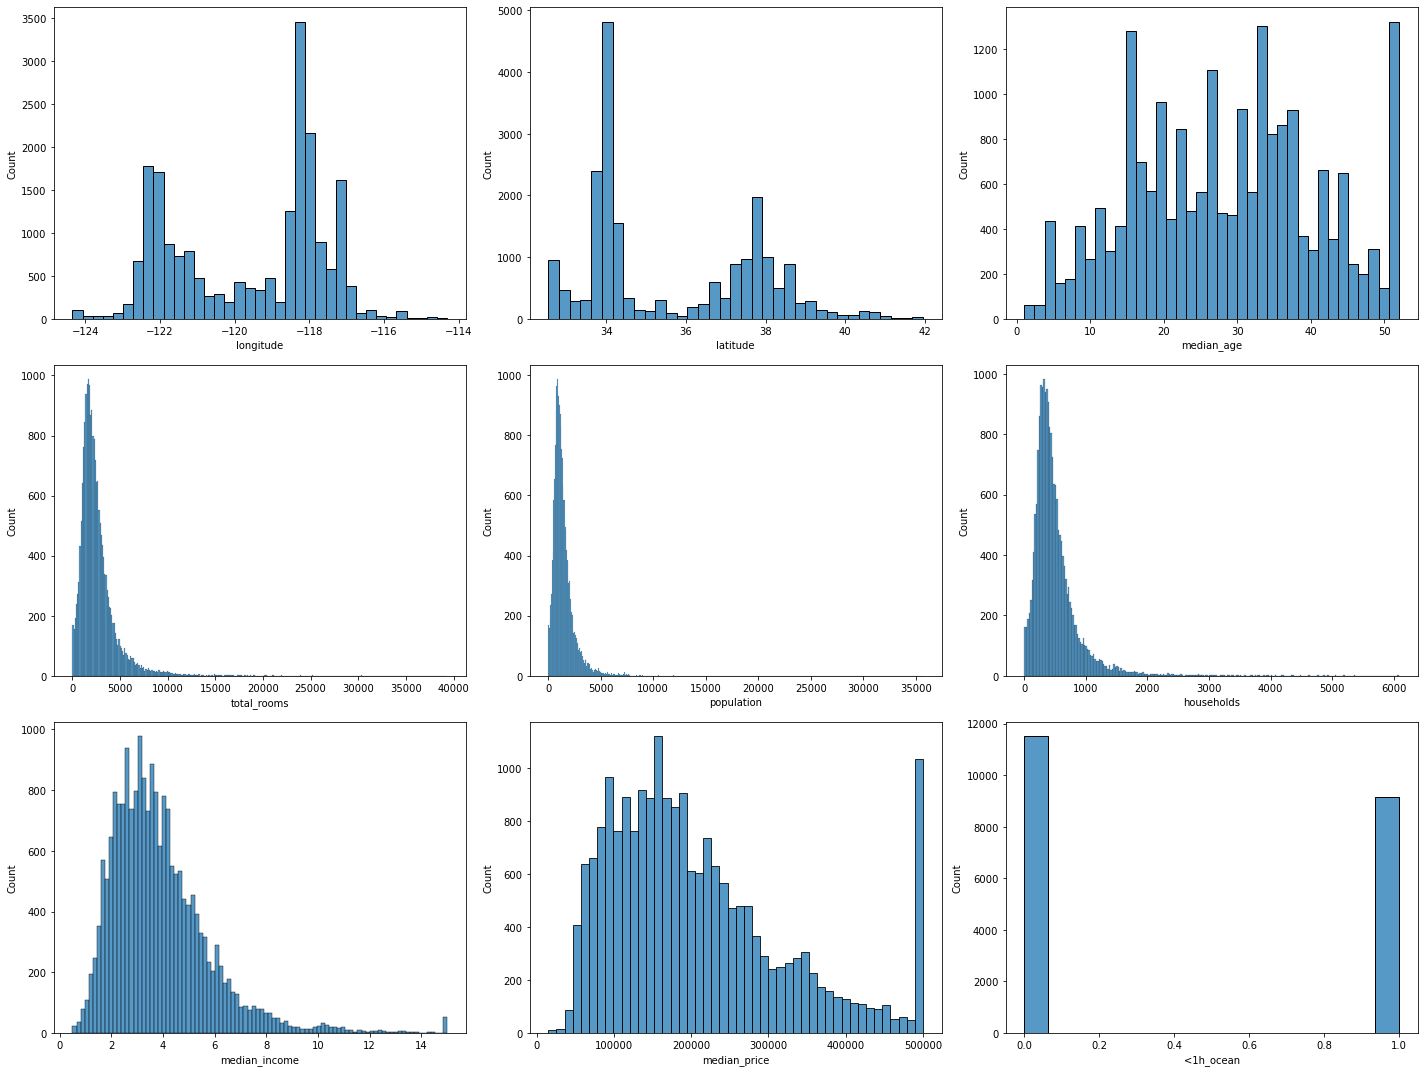

The mean longitude is -119.56970445736148
The mean latitude is 35.6318614341087


In [6]:
plt.rcParams['figure.figsize'] = (20, 15)

# Excluding the column 'ocean_proximity'
features = [col for col in df.columns if col != 'ocean_proximity']

plotArr = [None] * 10

for i in range(1, 10):
    plotArr[i] = plt.subplot(3, 3, i)
    plt.tight_layout()
    sns.histplot(data=df, x=features[i - 1], ax=plotArr[i])


# plotArr[4].set_xlim([0, 10000]) 
# plotArr[5].set_xlim([0, 3000]) 
# plotArr[6].set_xlim([0, 10000]) 
# plotArr[7].set_xlim([0, 2000]) 
plt.show()

mean_longitude = df['longitude'].mean()
mean_latitude = df['latitude'].mean()

print(f"The mean longitude is {mean_longitude}")
print(f"The mean latitude is {mean_latitude}")